# Scikit-learn

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd

## Normalization

In [10]:
# data
ratings_movies = {'Ratings':[5,4,3,2,5,4,3,1,2,2,3]}
ratings_wines = {'Ratings': [90,85,70,65,95,80,75]}

# dataframes

movies_df = pd.DataFrame(ratings_movies)
wines_df = pd.DataFrame(ratings_wines)

# Normalization
 
scaler = MinMaxScaler()
movies_df['Ratings_normalized'] = scaler.fit_transform(movies_df[['Ratings']])
wines_df['Ratings_normalized'] = scaler.fit_transform(wines_df[['Ratings']])

print('Normalized movie ratings:\n',movies_df)
print('Normalized wine ratings:\n',wines_df)
 

Normalized movie ratings:
     Ratings  Ratings_normalized
0         5                1.00
1         4                0.75
2         3                0.50
3         2                0.25
4         5                1.00
5         4                0.75
6         3                0.50
7         1                0.00
8         2                0.25
9         2                0.25
10        3                0.50
Normalized wine ratings:
    Ratings  Ratings_normalized
0       90            0.833333
1       85            0.666667
2       70            0.166667
3       65            0.000000
4       95            1.000000
5       80            0.500000
6       75            0.333333


## Endocing categorial variables

In [20]:
# Normalization and encoding of categorical variables

movies_features = {'Movie genre': ['Action','Comedy','Drama','Action']}
wines_features = {"Wine grape": ['Cabernet Sauvignon','Chardonnay','Merlot','Cabernet Sauvignon']}

# Dataframe
movies_features_df = pd.DataFrame(movies_features)
wines_features_df = pd.DataFrame(wines_features)


#Converting categorical variables in numerical variables
labelEncoder = LabelEncoder()
onehotEncoder = OneHotEncoder() # I will use this to movies features

#Movies
#movies_features_df['Genre_LabelEncoded'] = labelEncoder.fit_transform(movies_features_df['Movie genre'])
movies_encoded = onehotEncoder.fit_transform(movies_features_df[['Movie genre']]).toarray()

# Wines
wines_features_df['Grape_LabelEncoded'] = labelEncoder.fit_transform(wines_features_df['Wine grape'])

print('\nMovie preferences encoded::')
print(movies_encoded)
print('\nWine preferences encoded:')
print(wines_features_df)
print('')


Movie preferences encoded::
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Wine preferences encoded:
           Wine grape  Grape_LabelEncoded
0  Cabernet Sauvignon                   0
1          Chardonnay                   1
2              Merlot                   2
3  Cabernet Sauvignon                   0



## Exploring the Wine dataset

In [21]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


In [27]:
wine = load_wine()

# DataFrame

df = pd.DataFrame(wine.data, columns=wine.feature_names)

print("Wines features: ")
print(df.head(2))

#df['target']=wine.target

Wines features: 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  


C:\Users\diele\AppData\Local\Temp\ipykernel_17428\2998915598.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['flavanoids'],df['color_intensity'],cmap='viridis',alpha=0.7)


4

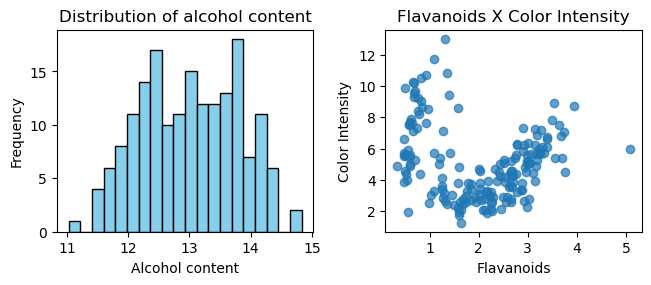

In [33]:
# Dataviz

# alcohol content
plt.subplot(2,2,1)
plt.hist(df['alcohol'],bins=20,color='skyblue', edgecolor='black')
plt.title('Distribution of alcohol content')
plt.xlabel('Alcohol content')
plt.ylabel('Frequency')

# Flavonoids x color intensity

plt.subplot(2,2,2)
plt.scatter(df['flavanoids'],df['color_intensity'],cmap='viridis',alpha=0.7)
plt.title('Flavanoids X Color Intensity')
plt.xlabel("Flavanoids")
plt.ylabel("Color Intensity")
plt.tight_layout(pad=0.3)


4


